# Image inversion with numpy

## Read training data

In [1]:
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import tables

In [2]:
# Convert PIL image to 200x200 array normalised to -0.5 to 0.5 rage.
def image_2_array(filename):
    # PIL image pil_img
    pil_img=Image.open(filename)
    pil_arr=np.array(pil_img)
    pil_max = np.amax(np.absolute(pil_arr))
    pil_min = np.amin(np.absolute(pil_arr))
    #print ("Max/min:"+ str(pil_max)+"/"+str(pil_min))
    if pil_max == 0:
        return pil_img,pil_arr
    pil_scaled_arr = (pil_arr / pil_max) - 0.5
    return pil_img, pil_scaled_arr

# Invert normalised PIL image
def invert_array(arr):
    #print(arr.shape)
    #print(arr[100][50:60])
    inverted_arr = arr * (-1)
    #print(inverted_arr[100][50:60])
    return inverted_arr
    
# Convert normalized array to PIL image
def array_2_image(arr):
    MAX = 255
    arr_scaled = (arr + 0.5) * MAX
    arr_max = np.amax(arr_scaled)
    arr_min = np.amin(arr_scaled)
    #print ("Array Max/min:"+ str(arr_max)+"/"+str(arr_min))
    im = Image.fromarray(arr_scaled)
    return im

# I. Image inversion

In [3]:
# Prepare inversed images
plot = False
save = False  # Only need to save once
if save:
    for dataset in range(1, 11):
        for img_counter in range(1, 11):
            # Read Image
            dataset_str = str(dataset).zfill(3)
            image_str = str(img_counter).zfill(4)
            filename = "/notebooks/data001/move" + \
                    dataset_str+"_"+image_str+".gif"
            #print filename
            img,a = image_2_array(filename)
            #print("Orgarr:")
            #print(a)


            in_arr = invert_array(a)
            #print("Invarr:")
            #print(in_arr)
            new_im = array_2_image(in_arr)
            new_filename = "/notebooks/data001/move_inv_" + \
                    dataset_str+"_"+image_str+".gif"
            # Save new image to file
            new_im.save(new_filename, "GIF")
            # Plot
            if (plot):
                _, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
                ax1.imshow(img);
                ax2.imshow(a, vmin=-0.5, vmax=0.5,cmap=plt.cm.Greys);
                ax3.imshow(in_arr, cmap=plt.cm.Greys);
                ax4.imshow(new_im);



# Prepare training set

train_data_onedimension получается из:

1 картинка 200x200 px = 40 000<br>
8 наборов (range) по 10 картинок (img_counter) = 80<br>
Итого: 40 000 * 80 = 3 200 000

In [4]:
# Read training images into array of shape (80, 200, 200, 1)
IMSIZE=200
train_data_onedimension = np.array([]) #np.empty([80,200,200,1])
train_labl_onedimension = np.array([])
for dataset in range(1, 9):
    for img_counter in range(1, 11):
        dataset_str = str(dataset).zfill(3)
        image_str = str(img_counter).zfill(4)
        # Samples
        filename = "data001/move" + \
                dataset_str+"_"+image_str+".gif"
        #print filename
        img, a = image_2_array(filename)
        
        train_data_onedimension = np.append(train_data_onedimension, a)
        # Targets (labels)
        filename = "data001/move_inv_" + \
                dataset_str+"_"+image_str+".gif"
        #print filename
        img,a = image_2_array(filename)
        train_labl_onedimension = np.append(train_labl_onedimension, a)
        
        
print train_data_onedimension.shape
print train_labl_onedimension.shape

images_in_set = train_data_onedimension.size / (IMSIZE*IMSIZE)
print images_in_set
train_data = train_data_onedimension.reshape(images_in_set, IMSIZE, IMSIZE, 1)
print train_data.shape
train_labl = train_labl_onedimension.reshape(images_in_set, IMSIZE, IMSIZE, 1)
print train_labl.shape

(3200000,)
(3200000,)
80
(80, 200, 200, 1)
(80, 200, 200, 1)


## Newral Network 

L – Number of layers = 3

$s_j$ – кол-во элементов в слое j

Кол-во элементов по слоям:
$s_1$ = 40000
$s_2$ = 40000
$s_3$ = 40000



In [5]:
L = 3
s1= IMSIZE*IMSIZE
s = np.ones(L, dtype=np.int) * s1
s

array([40000, 40000, 40000])

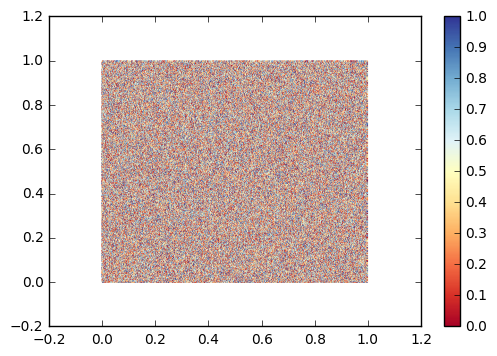

In [31]:
import math
from __future__ import division
def plot_data(data):
    
    #plt.figure()
    s = 1
    cm = plt.cm.get_cmap('RdYlBu')
    
    x = []
    y = []
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
    #        x = np.arange(0,1,1/data.shape[0])
    #        y = np.arange(0,1,1/data.shape[1])
            x.append(i/data.shape[0])
            y.append(j/data.shape[1])
    p = plt.scatter(x, y,
                    cmap= cm,
                    c = data, 
                    vmin=0, vmax=1,
                    linewidths = 0,
                    s = s, alpha = 1)

    plt.colorbar(p)
    #plt.axis('off')
    #plt.title("Scatter")
    
    
plt.figure()
test_data=np.random.rand(500,500)
plot_data(test_data)
plt.show()



In [32]:
for i in range(0,5,10):
    print i


0


In [19]:
import time, sys

# Store ones-matrix of rank 2 with given shape and given file path.
# Shape must be a list of 2 ints.
def ones_table(path, shape):
    try:
        print "ones for "+path
    
        f = tables.open_file(path, 'w')    
        root = f.root
        shape1=(0, shape[1])
        atom = tables.Float16Atom()
        #filters = tables.Filters(complevel=5, complib='blosc')
        x = f.create_earray(root,'x', atom, #filters = filters,
                            shape = shape1, expectedrows = shape[0])
        start = time.clock()
        if shape[0] > 1000:
            step=1000
        else:
            step=shape[0]
        for i in range(0, shape[0], step):
            print i
            ones = np.ones((step, shape[1]))
            x.append(ones)
        end = time.clock()
        plot_data(x)
        print x
        print "Execution time: ", end-start
        f.close()
        return x
    except:
        import traceback
        print "Closing " + path
        print "Unexpected error:", sys.exc_info()[0]
        traceback.print_exc()
        f.close()
        return None


ones for ones1.hdf
0
/x (EArray(100, 100)) ''
Execution time:  0.000404999999997
Ones matrix saved to ones1.hdf
<closed tables.earray.EArray at 0x7fd9edae42f8>


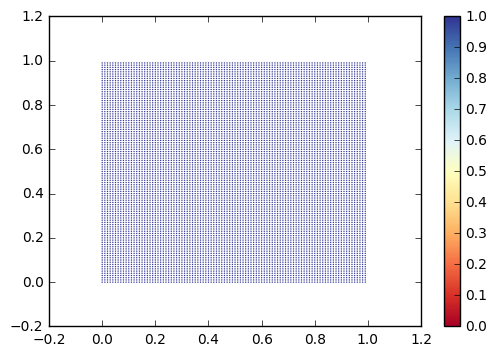

In [20]:
shape=(100, 100)
fname = "ones1.hdf"
x = ones_table(fname, shape)
if x is not None:
    print "Ones matrix saved to " + fname
print x


In [26]:
import time

# Store random matrix of rank 2 with given shape and given file path.
# Random values will be from r to R.
# Shape must be a list of 2 ints.
def rand_table(path, shape, r, R):
    try:
        f = tables.open_file(path, 'w')    
        root = f.root
        shape1=(0, shape[1])
        atom = tables.Float16Atom()
        #filters = tables.Filters(complevel=5, complib='blosc')
        x = f.create_earray(root,'x', atom, #filters = filters,
                            shape = shape1, expectedrows = s1)
        #print x.shape1
        start = time.clock()
        step=1000
        for i in range(0, shape[0], step):
            print i
            rnd = np.random.rand(step, shape[1]) * (R - r) + r
            x.append(rnd)
        end = time.clock()
        print x
        print "Execution time: ", end-start
        f.close()
    except:
        print "Closing " + path
        try:
            f = tables.open_file(fname, mode='r')
        except:
            pass
        f.close()
        return False

    return True

In [27]:
res = rand_table(fname, shape, 0.5, 2.5)
if res:
    print "Random matrix saved to " + fname

0
/x (EArray(1000, 100)) ''
Execution time:  0.00826
Random matrix saved to ones1.hdf


In [9]:
shape=(s[1], s[0]+1)
fname = "theta1.hdf"
res = rand_table(fname, shape, 0.5, 2.5)
if res:
    print "Random matrix saved to " + fname

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
/x (EArray(40000, 40001)) ''
Execution time:  215.115052
Random matrix saved to theta1.hdf


_With filters: запись в файл стала примерно в 1.5 раза медленее  – 90s / 120s, размер файла на диске не изменился – 3GB._

### Test read data from hdf file

0
(1000, 100)
10000
20000
30000


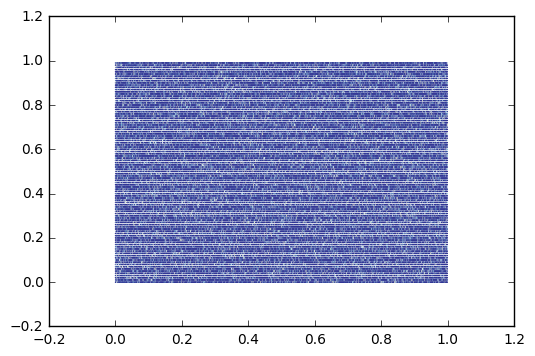

In [29]:
f = tables.open_file(fname, mode='r')
plt.figure()
for i in range(0,s1,10000):
    print i
    x = f.root.x[i:i+1000]
    if x.shape[0] > 0:
        print x.shape
        plot_data(x)
f.close()
plt.show()

Links:
http://www.pytables.org/usersguide/libref/homogenous_storage.html#the-carray-class
http://www.pytables.org/usersguide/tutorials.html
https://kastnerkyle.github.io/posts/using-pytables-for-larger-than-ram-data-processing/


### 1. Random $\Theta$ initialisation

$\epsilon=0.5$

In [11]:
import pandas as pd

In [11]:
INIT_EPSILON=0.5
Theta = []
for j in range(1,L):
    print j, s[j-1], s[j]*(s[j-1]+1)
    shape=(s[j], s[j-1]+1)
    fname = "theta" + str(j).zfill(2) + ".hdf"
    res = rand_table(fname, shape, 0.5, 2.5)
    if res:
        print "Random matrix saved to " + fname
    #theta = np.zeros((s[j],s[j-1]+1), dtype = np.float16)
    #theta[:] = np.random.rand(theta.shape) * (2*INIT_EPSILON) - INIT_EPSILON
    Theta.append(fname) 
print Theta

1 40000 1600040000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
/x (EArray(40000, 40001)) ''
Execution time:  182.050957
Random matrix saved to theta01.hdf
2 40000 1600040000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
/x (EArray(40000, 40001)) ''
Execution time:  184.183979
Random matrix saved to theta02.hdf
['theta01.hdf', 'theta02.hdf']


_Note: Access $\Theta_1$ as `Theta[0]`, $\Theta_2$ as `Theta[1]`._


For regularisation use matrix $\Theta$ without first (bias) column. Name it $\hat{\Theta}$. Store it in list of arrays `Theta_r`.

## 2. Forward propagation

Расчитываем значения в узлах сети $a_i^{(l)}$ – в узле $i$ слоя $l$ :

$$ a_i^{(l)} = \sum_{j=0}^{s_l}\theta^{l-1}_{i,j}a_j^{(l-1)}$$

$$ a^1 = x $$

Это эквивалентно умножению строки $i$ матрицы весов $\Theta$ на вектор-столбец $a^{l-1}$. Или:

$$ a^l = \Theta^{l-1}a^{l-1} $$


## 3. Backward propagation

Cost function нам не нужна. Используем расчет дельта:

$$\delta^L = a^L - y$$

$$\delta^l = (( \Theta^l)^T\delta^{l+1}) .* (a^l(1-a^l))$$

### 3. Cost function

$$J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m}\sum_{k=1}^{K}(h_\Theta(x^i)_k - y^i_k)^2 + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{o=1}^{s_l}\sum_{p=1}^{s_{l+1}}(\hat{\Theta}_{p,o}^l)^2 $$

$\hat{\Theta}$ - Theta_r - $\Theta$ without first column.

In code below:

$\lambda = lmbd$,

$h_{\Theta} = H$

In [14]:
# Return cost and gradient for given Theta.
# Parameters:
# Theta – weights,
# L – number of layers in NN,
# s – number of elements in each layer,
# H – hypothesis data,
# Y – target data,
# lmbd – regularisation parameter lambda.
def costFunction(Theta, L, s, H, Y, lmbd):
    # Initialisation. Need to return the following variables:
    J = 0;
    Theta_grad = []
    for j in range(1,L):
        Theta_grad.append(np.zeros(size(Theta[j-1])))
                          
    # Remove first column from Theta1
    Theta_r = []
    for j in range(1,L):
        theta_reduced = Theta[j-1][:, 1:]
        Theta_r.append(theta_reduced)
        print(Theta_r[j-1].shape)
        
    # SUM for J



In [11]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
x.shape
x[:,0:2]
x.sum()

21